In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import print_function

import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model
from keras.datasets import mnist

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error, binarize_images

## Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Load model

In [3]:
model_location = os.path.join('..', 'models', 'rotnet_mnist.hdf5')
model = load_model(model_location, custom_objects={'angle_error': angle_error})

## Evaluate model

In [4]:
batch_size = 128
out = model.evaluate_generator(
    RotNetDataGenerator(
        X_test,
        batch_size=batch_size,
        preprocess_func=binarize_images,
        shuffle=True
    ), 
    steps=len(y_test) / batch_size


/var/folders/49/0f9phc990nx8hlxk_rkp3_8r0000gn/T/ipykernel_59454/3491434466.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  out = model.evaluate_generator(


Test loss: 3.414159059524536
Test angle error: 39.2947998046875


In [13]:
len(X_test[0][0])

28

In [ ]:
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

## Display examples

1/1 [==============================] - 0s 48ms/step


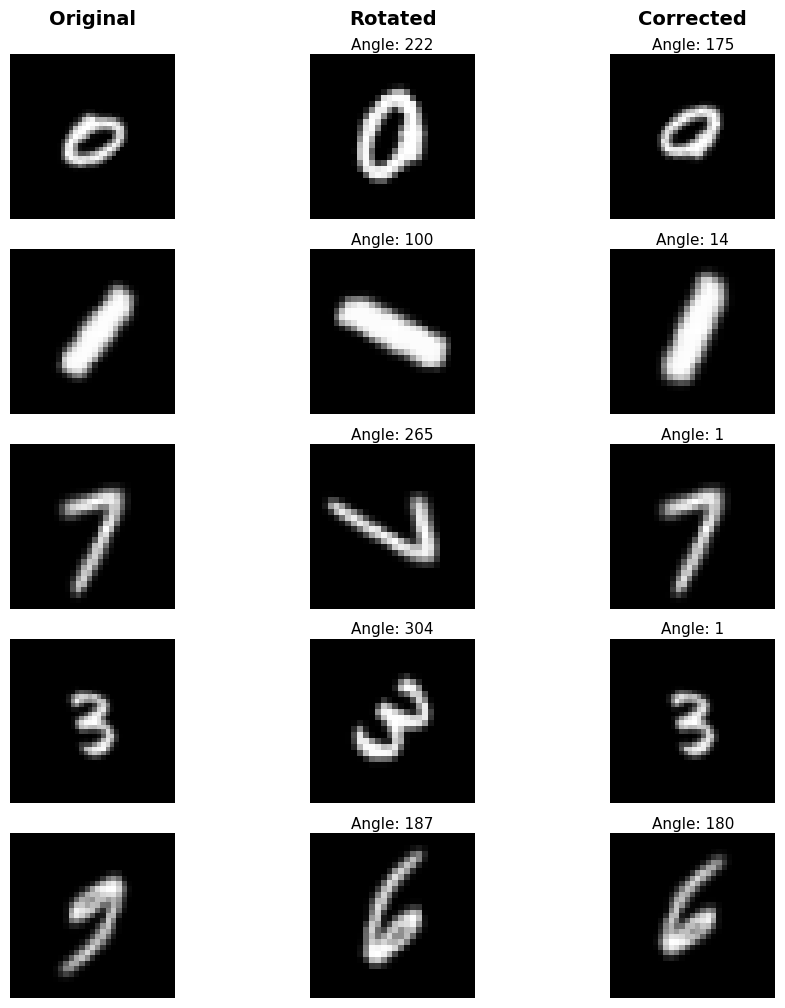

In [5]:
num_images = 5

display_examples(
    model, 
    X_test,
    num_images=num_images,
    preprocess_func=binarize_images,
)